# Classification Models

In [1]:
import pandas as pd
import numpy as np

## plotting libraries
from matplotlib import pyplot as plt

## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

## 1. Rond 1

### 1.1. Loading Classification Sample Datasets

In [3]:
# read data
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
churnData.gender.unique()

array(['Female', 'Male'], dtype=object)

In [5]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

### 1.2. Cleaning Data

In [6]:
# Convert the column TotalCharges and
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [7]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [8]:
# fill the NaN elements with mean
churnData.fillna(churnData['TotalCharges'].median(), inplace=True)

### 1.3. Spliting Data

#### 1.3.1. Spliting target variable (x) and predictor variable (y)

In [9]:
selected_features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = churnData.loc[:, selected_features]
y = churnData.Churn

In [10]:
# selected_features = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
# X = churnData.loc[:, selected_features]
# y = churnData.Churn

In [11]:
X.isna().any()

tenure            False
SeniorCitizen     False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [12]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


#### 1.3.2. Spliting Training Set and Testing Set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TT_SPLIT, random_state = RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
6924,1,0,69.35,69.35
5249,72,0,67.20,4671.70
5852,21,1,69.10,1474.75


### 1.4. Standardizing Data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = selected_features)
X_test  = pd.DataFrame(X_test, columns = selected_features)

### 1.5. Predictive Modeling

#### 1.5.1. Applying Logistic Regression Model

In [15]:
log_model = LogisticRegression() 

log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

In [16]:
np.unique(y_train)

array(['No', 'Yes'], dtype=object)

In [17]:
np.unique(y_pred_train_log)

array(['No', 'Yes'], dtype=object)

In [18]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_log),
                                          precision_score(y_train_np, y_pred_train_log, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_log, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_log),
                                         precision_score(y_test_np, y_pred_test_log, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_log, pos_label='Yes')]})

display(performance_log)


,Error_metric,Train,Test
0,Accuracy,0.794462,0.780696
1,Precision,0.655240,0.661597
2,Recall,0.453559,0.441624


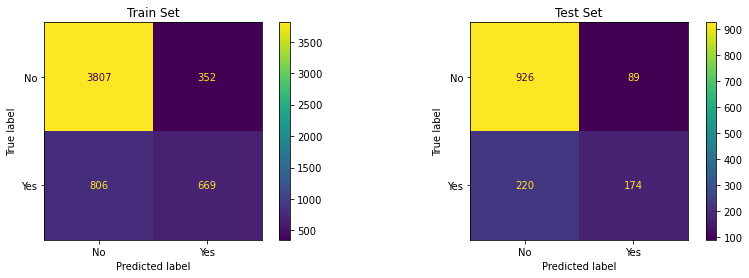

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_log)
cm_test = confusion_matrix(y_test_np, y_pred_test_log)

ConfusionMatrixDisplay(cm_train, display_labels=log_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")
            
ConfusionMatrixDisplay(cm_test, display_labels=log_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

#### 1.5.2. Applying Knn Classifier Model

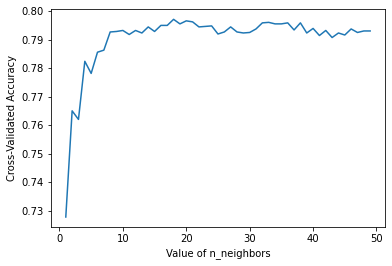

The best value of n_neighbors is 18


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Create KNN model
knn_model = KNeighborsClassifier()

# Create list of values of n_neighbors to evaluate
n_neighbors = range(1, 50)

# Evaluate KNN model for each value of n_neighbors using 10-fold cross-validation
scores = []
for n in n_neighbors:
    knn_model.set_params(n_neighbors=n)
    score = cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy').mean()
    scores.append(score)

# Plot the results
plt.plot(n_neighbors, scores)
plt.xlabel('Value of n_neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Select best value of n_neighbors based on cross-validation results
best_n = n_neighbors[np.argmax(scores)]
print(f"The best value of n_neighbors is {best_n}")


In [21]:
knn_model = KNeighborsClassifier(n_neighbors = 18, weights = 'uniform') 
knn_model.fit(X_train, y_train) 

y_pred = knn_model.predict(X_test) 

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

In [22]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_knn),
                                          precision_score(y_train_np, y_pred_train_knn, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_knn, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_knn),
                                         precision_score(y_test_np, y_pred_test_knn, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_knn, pos_label='Yes')]})

display(performance_knn)

,Error_metric,Train,Test
0,Accuracy,0.810614,0.783534
1,Precision,0.709877,0.675889
2,Recall,0.467797,0.434010


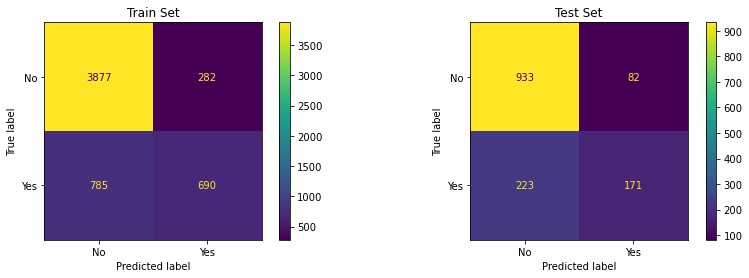

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_knn)
cm_test = confusion_matrix(y_test_np, y_pred_test_knn)

ConfusionMatrixDisplay(cm_train, display_labels=knn_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=knn_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()

#### 1.5.3. Comparing KNN and Logistic Regression Models

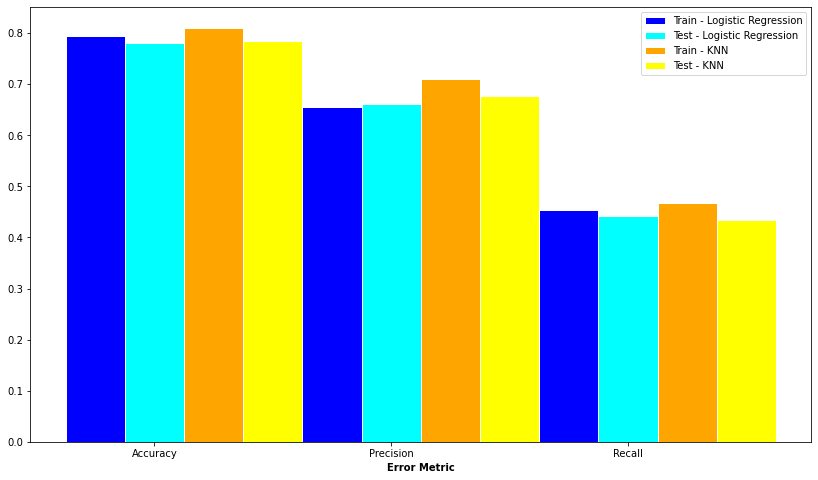

In [24]:
# Create bar chart comparing KNN and logistic regression models
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the figure
plt.figure(figsize=(14, 8))

# Set the width of the bars
barWidth = 0.25

# Set the height of the bars
bars_train_log = performance_log['Train']
bars_test_log = performance_log['Test']
bars_train_knn = performance_knn['Train']
bars_test_knn = performance_knn['Test']

# Set the position of the bars on the x-axis
r1 = np.arange(len(bars_train_log))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plot the bars
plt.bar(r1, bars_train_log, color='blue', width=barWidth, edgecolor='white', label='Train - Logistic Regression')
plt.bar(r2, bars_test_log, color='cyan', width=barWidth, edgecolor='white', label='Test - Logistic Regression')
plt.bar(r3, bars_train_knn, color='orange', width=barWidth, edgecolor='white', label='Train - KNN')
plt.bar(r4, bars_test_knn, color='yellow', width=barWidth, edgecolor='white', label='Test - KNN')

# Add xticks on the middle of the group bars
plt.xlabel('Error Metric', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars_train_log))], ['Accuracy', 'Precision', 'Recall'])

# Add a legend
plt.legend()

# Show the chart
plt.show()

## 2. Round 2

In [31]:
# No need to scale the train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TT_SPLIT, random_state = RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [32]:
td_model = DecisionTreeClassifier(max_depth=3)

td_model.fit(X_train, y_train) 

y_pred = td_model.predict(X_test) 

y_pred_train_td = td_model.predict(X_train)
y_pred_test_td = td_model.predict(X_test)

<BarContainer object of 4 artists>

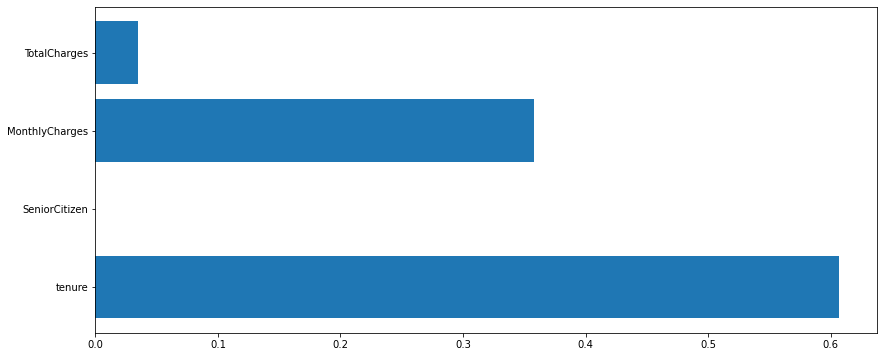

In [41]:
plt.figure(figsize=(14,6))
plt.barh(X.columns,td_model.feature_importances_)

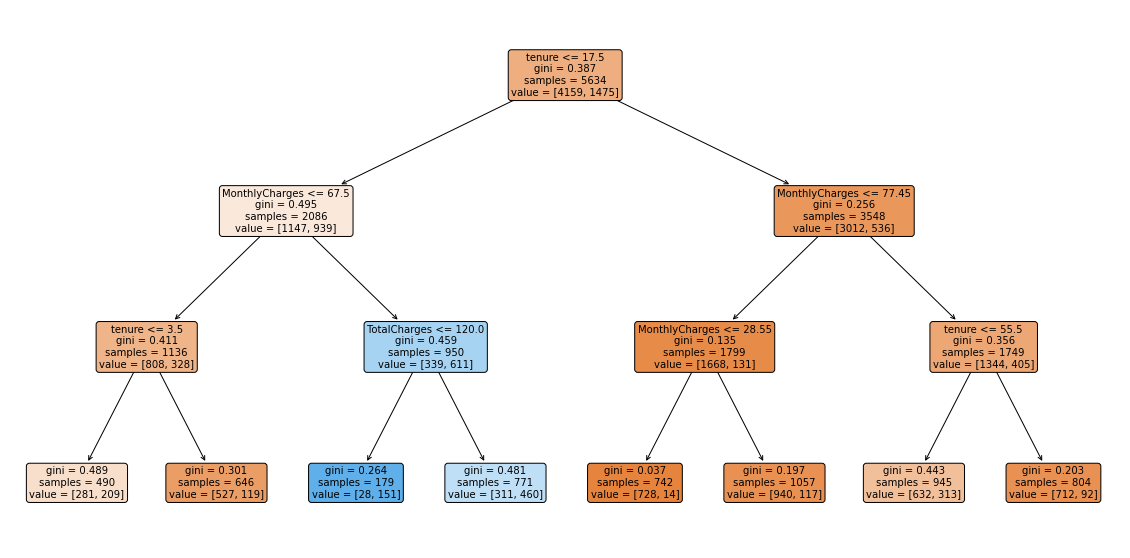

In [36]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(td_model, 
          filled = True, 
          rounded = True,  
          # show the feature names
          feature_names = X_train.columns)
plt.show()

In [27]:
# Performance

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

performance_td = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train_np, y_pred_train_td),
                                          precision_score(y_train_np, y_pred_train_td, pos_label='Yes'),
                                          recall_score(y_train_np, y_pred_train_td, pos_label='Yes')],
                                'Test': [accuracy_score(y_test_np, y_pred_test_td),
                                         precision_score(y_test_np, y_pred_test_td, pos_label='Yes'),
                                         recall_score(y_test_np, y_pred_test_td, pos_label='Yes')]})

display(performance_td)

,Error_metric,Train,Test
0,Accuracy,0.786475,0.771469
1,Precision,0.643158,0.638462
2,Recall,0.414237,0.421320


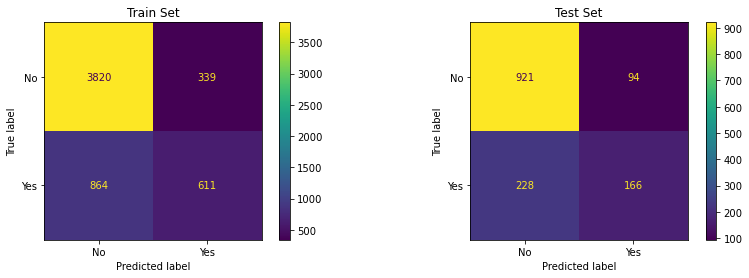

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(14,4))

cm_train = confusion_matrix(y_train_np, y_pred_train_td)
cm_test = confusion_matrix(y_test_np, y_pred_test_td)

ConfusionMatrixDisplay(cm_train, display_labels=td_model.classes_).plot(ax=ax[0], values_format='d')
ax[0].set_title("Train Set")

ConfusionMatrixDisplay(cm_test, display_labels=td_model.classes_).plot(ax=ax[1], values_format='d')
ax[1].set_title("Test Set")

plt.show()